# Final Projects: Calculating evolutionary distance

In this notebook you will compare the amino acid sequence of hemoglobin alpha from 3 different species to find out which two are most closely related.

Hypothesis: The lizard and the turtle are the closest related to each other due to their closely related features such as scales and because they look the most alike

You'll need to copy and paste the function from last class that finds the number of differences in two sequences:

In [1]:
def diff(larger_seq, smaller_seq):
    
    difference = 0
    
    for c, i in enumerate(larger_seq):
        if i != smaller_seq[c]:
            difference += 1
        else:
            continue
            
    return difference

In order to compare the different amino acid sequences, we need to open the files and read the sequences into new variables:

In [2]:
cdna = open("2_Chicken_CSNK2B_DNA.txt").read()
tdna = open("2_BoxTurtle_CSNK2B_DNA.txt").read()
ldna = open("2_GreenAnole_CSNK2B_DNA.txt").read()

Decide as a group whether you want to compare DNA or protein sequences for your species. What are the pros and cons of each?

In [3]:
# If you choose to use the transcribe and translate functions, you can copy and paste them here

def translate(RNAseq):
    protein = ""
    codon = ""

    codon_dict = {"UUU":"F","UUC":"F","UUA":"L","UUG":"L", "CUU":"L","CUC":"L", 
             "CUA":"L","CUG":"L","AUU":"I","AUC":"I","AUA":"I","AUG":"M",
             "GUU":"V","GUC":"V","GUA":"V","GUG":"V","UCU":"S","UCC":"S",
             "UCA":"S","UCG":"S","CCU":"P","CCC":"P","CCA":"P","CCG":"P",
             "ACU":"T","ACC":"T","ACA":"T","ACG":"T","GCU":"A","GCC":"A",
             "GCA":"A","GCG":"A","UAU":"Y","UAC":"Y","UAA":"STOP","UAG":"STOP",
             "UGA":"STOP","CAU":"H","CAC":"H","CAA":"Q","CAG":"Q","AAU":"N",
             "AAC":"N","AAA":"K","AAG":"K","GAU":"D","GAC":"D","GAA":"E",
             "GAG":"E","UGU":"C","UGC":"C","UGG":"W","CGU":"R","CGC":"R",
             "CGA":"R","CGG":"R","AGU":"S","AGC":"S","AGA":"R","AGG":"R",
             "GGU":"G","GGC":"G","GGA":"G","GGG":"G"}
    
    for i in RNAseq:
        if len(codon) == 3:
            protein += codon_dict[codon] 
            codon = "" 
            codon += i 
        else:
            codon += i 
    return protein




def transcribe(DNAseq):
    
    RNA = ""
    
    for base in DNAseq:
        if base == "A":
            RNA += "U"
        elif base == "T":
            RNA += "A"
        elif base == "G":
            RNA += "C"
        elif base == "C":
            RNA += "G"
        else:
            continue
    return RNA

Now call the number of differences function 3 times to compare all three of your species' sequences.

In [4]:
cP = translate(transcribe(cdna))
tP = translate(transcribe(tdna))
lP = translate(transcribe(ldna))

print(cP)
print()
print(tP)
print()
print(lP)
print()


MSSSEEVSWISWFCGLRGNEFFCEVDEDYIQDKFNLTGLNEQVPHYRQALDMILDLEPDEELEDNPNQSDLIEQAAEMLYGLIHARYILTNRGIAQMLEKYQQGDFGYCPRVYCENQPMLPIGLSDIPGEAMVKLYCPKCMDVYTPKSSRHHHTDGAYFGTGFPHMLFMVHPEYRPKRPANQFVPRLYGFKIHPMAYQLQLQAASNFKSPVKTIRSTOPWGDLWGGLWGLGWGGLWGRGGWGDFGVNSCRFGSVESTOPKKEPRG

MSSSEEVSWISWFCGLRGNEFFCEVDEDYIQDKFNLTGLNEQVPHYRQALDMILDLEPDEELEDNPNQSDLIEQAAEMLYGLIHARYILTNRGIAQMLEKYQQGDFGYCPRVYCENQPMLPIGLSDIPGEAMVKLYCPKCMDVYTPKSSRHHHTDGAYFGTGFPHMLFMVHPEYRPKRPANQFVPRLYGFKIHPMAYQLQLQAASNFKSPVKTIRSTOPSSARTPGSPSPKPAPFP

MSSSEEVSWISWFCGLRGNEFFCEVDEDYIQDKFNLTGLNEQVPHYRQALDMILDLEPDEELEDNPNQSDLIEQAAEMLYGLIHARYILTNRGIAQMLEKYQQGDFGYCPRVYCENQPMLPIGLSDIPGEAMVKLYCPKCMDVYTPKSSRHHHTDGAYFGTGFPHMLFMVHPEYRPKRPANQFVPRLYGFKIHPMAYQLQLQAASNFKSPVKTIRSTOPSSTSRCPGPAVIIPLSTOPSSQGCLYFDFGSTOPCPLWTVFATLQPDFSTOP



In [5]:
TLdiff = diff(tP, lP)

TCdiff = diff(tP, cP)

CLdiff = diff(cP, lP)


What can you conclude based on the number of differences between each pair of species?

Next, create a function that returns the percent difference between sequences and call it for your three comparisons:

In [6]:
def percent(larger_seq, smaller_seq):
    
    diff_percent = ()
    
    diff_percent =+ (diff(larger_seq, smaller_seq) / (len(larger_seq) + len(smaller_seq)) / 2 * 100)
                     
    return diff_percent

print(percent(cP, lP))
print(percent(tP, lP))
print(percent(tP, cP))

CL = percent(cP, lP)
LT = percent(tP, lP)
CT = percent(tP, cP)

4.197761194029851
1.3806706114398422
1.5968063872255487


In [7]:
avglen_CL = int((len(cP) + len(lP)) / 2)
avglen_TL = int((len(tP) + len(lP)) / 2)
avglen_CT = int((len(cP) + len(tP)) / 2)

print(avglen_CL)
print(avglen_TL)
print(avglen_CT)


268
253
250


Let's visualize these results! Choose a graph type that you think will communicate your conclusions effectively and create it using matplotlib:

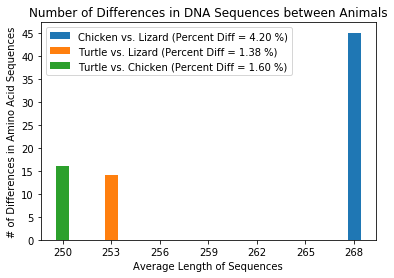

In [12]:
import matplotlib.pyplot as plt 


plt.bar(avglen_CL, CLdiff, label = "Chicken vs. Lizard (Percent Diff = 4.20 %)")
plt.bar(avglen_TL, TLdiff, label = "Turtle vs. Lizard (Percent Diff = 1.38 %)")
plt.bar(avglen_CT, TCdiff, label = "Turtle vs. Chicken (Percent Diff = 1.60 %)")
plt.legend(loc = 2)
plt.xticks(range(250, 270, 3))
plt.yticks(range(0, 50, 5))
plt.ylabel("# of Differences in Amino Acid Sequences")
plt.xlabel("Average Length of Sequences")
plt.title("Number of Differences in DNA Sequences between Animals")
plt.show()

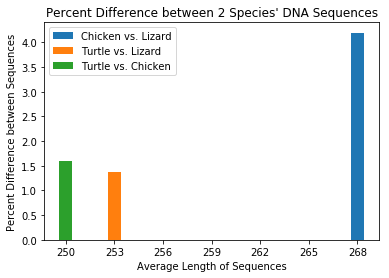

In [27]:
plt.bar(avglen_CL, CL, label = "Chicken vs. Lizard")
plt.bar(avglen_TL, LT, label = "Turtle vs. Lizard")
plt.bar(avglen_CT, CT, label = "Turtle vs. Chicken")
plt.legend()
plt.xticks(range(250, 270, 3))
plt.xlabel("Average Length of Sequences")
plt.ylabel("Percent Difference between Sequences")
plt.title("Percent Difference between 2 Species' DNA Sequences")
plt.show()

## Coding Challenge
If you finish your project and want to try a challenge, come up with a hypothesis about which of the following species are most closely related to humans (carp, chicken, chimp, dog, eel, elephant, frog, gorilla, macaque monkey, mouse, orangutan, pig). Write out a ranked list with the species you think is most related to humans at the top.

Then calculate the percent difference between the hemoglobin amino acid sequences of humans and each species to find out how close you came to the right ranking!